In [1]:
# Question 2: the LSTM RNN approach

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plot
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam 
print(tf.__version__)

2.7.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_len=len(train_labels)
print('length of train dataset is',train_len)

length of train dataset is 60000


In [7]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_len=len(test_labels)
print('Length of test dataset is',test_len)

Length of test dataset is 10000


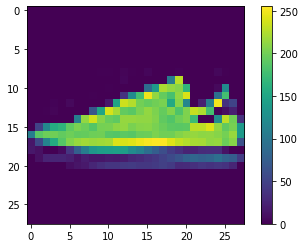

In [10]:
plot.figure()
plot.imshow(train_images[6])
plot.colorbar()
plot.grid(False)
plot.show()

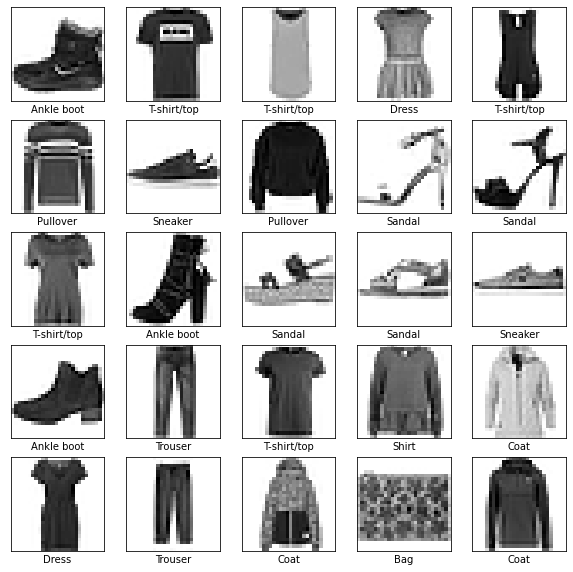

In [11]:
plot.figure(figsize=(10,10))
for i in range (25):
  plot.subplot(5, 5, i+1)
  plot.xticks([])
  plot.yticks([])
  plot.grid(False)
  plot.imshow(train_images[i], cmap=plot.cm.binary)
  plot.xlabel(class_names[train_labels[i]])
plot.show()

In [12]:
batch_size = 64    
num_classes = 10
epochs = 10
row_hidden = 128
col_hidden = 128

In [13]:
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [14]:
row, col, pixel = x_train.shape[1:]
print(row)
print(col)
print(pixel)

28
28
1


In [15]:
x = Input(shape=(row, col))
encoded_rows = LSTM(row_hidden,)(x)
#encoded_columns = LSTM(col_hidden,)(encoded_rows)
prediction = Dense(num_classes, activation='softmax')(encoded_rows)
#output= Dense(num_classes, activation='softmax')(prediction)
model = Model(x, prediction)
model.compile( loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit( train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images, test_labels)
          )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


938/938 [==============================] - 17s 13ms/step - loss: 0.6634 - accuracy: 0.7650 - val_loss: 0.5332 - val_accuracy: 0.8125
Epoch 2/10
938/938 [==============================] - 11s 12ms/step - loss: 0.4903 - accuracy: 0.8226 - val_loss: 0.4875 - val_accuracy: 0.8240
Epoch 3/10
938/938 [==============================] - 11s 12ms/step - loss: 0.4535 - accuracy: 0.8350 - val_loss: 0.4660 - val_accuracy: 0.8295
Epoch 4/10
938/938 [==============================] - 11s 12ms/step - loss: 0.4387 - accuracy: 0.8396 - val_loss: 0.4615 - val_accuracy: 0.8347
Epoch 5/10
938/938 [==============================] - 11s 12ms/step - loss: 0.4230 - accuracy: 0.8448 - val_loss: 0.4495 - val_accuracy: 0.8372
Epoch 6/10
938/938 [==============================] - 12s 12ms/step - loss: 0.4160 - accuracy: 0.8462 - val_loss: 0.4343 - val_accuracy: 0.8414
Epoch 7/10
938/938 [==============================] - 12s 12ms/step - loss: 0.4073 - accuracy: 0.8498 - val_loss: 0.4343 - val_accuracy: 0.8429
Epo

In [18]:
probability=model.predict(train_images[0:10])

In [19]:
probability[6]  # probability values values for  img

array([3.8336340e-05, 2.5715819e-05, 4.7567078e-06, 9.3544440e-05,
       3.9381275e-06, 2.8250171e-03, 2.2621743e-05, 9.9403447e-01,
       9.1672900e-06, 2.9424443e-03], dtype=float32)

In [20]:
argmax=np.argmax(probability,axis=1)   # array of highest probabilities
argmax

array([9, 0, 3, 3, 1, 2, 7, 2, 5, 5])

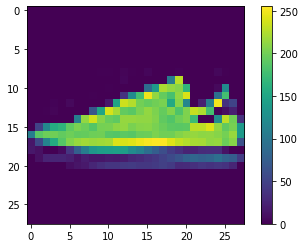

In [21]:
plot.figure()
plot.imshow(train_images[6])
plot.colorbar()
plot.grid(False)
plot.show()

In [22]:
print('Predicted value :' ,class_names[argmax[6]])  # precdiction

Predicted value : Sneaker


In [23]:
print('Actual value :' ,class_names[train_labels[6]])  #ground truth

Actual value : Sneaker


In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plot.grid(False)
  plot.xticks([])
  plot.yticks([])

  plot.imshow(img, cmap=plot.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plot.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plot.grid(False)
  plot.xticks(range(10))
  plot.yticks([])
  thisplot = plot.bar(range(10), predictions_array, color="#777777")
  plot.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

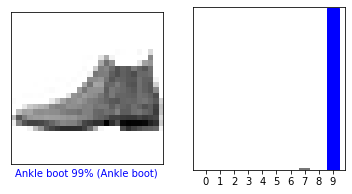

In [25]:
i = 0
plot.figure(figsize=(6,3))
plot.subplot(1,2,1)
plot_image(i, probability[i], test_labels, test_images)
plot.subplot(1,2,2)
plot_value_array(i, probability[i],  test_labels)
plot.show()

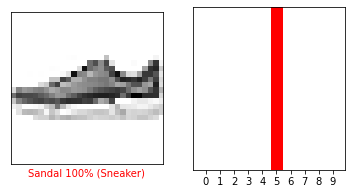

In [26]:
i = 9
plot.figure(figsize=(6,3))
plot.subplot(1,2,1)
plot_image(i, probability[i], test_labels, test_images)
plot.subplot(1,2,2)
plot_value_array(i, probability[i],  test_labels)
plot.show()

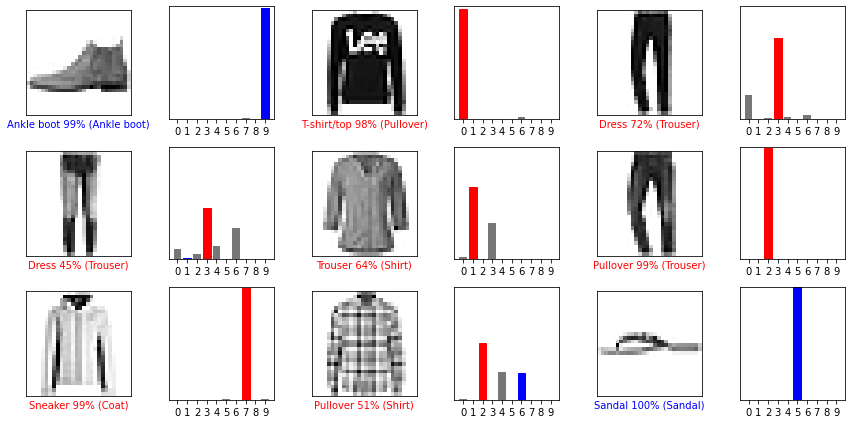

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plot.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plot.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, probability[i], test_labels, test_images)
  plot.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, probability[i], test_labels)
plot.tight_layout()
plot.show()

In [28]:
#CNN code

In [29]:
from tensorflow.keras.utils import to_categorical
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plot

In [30]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [31]:

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [32]:

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

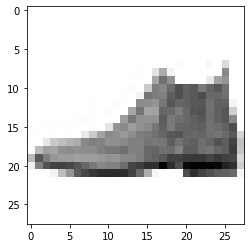

In [33]:

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam',metrics=['accuracy'])
model.summary()

model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)

test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

plot.imshow(test_X[0].reshape(28, 28), cmap = plot.cm.binary)
plot.show()

In [34]:
#CNN Code implementation

In [35]:
batch_size = 64    
num_classes = 10
epochs = 10
row_hidden = 128
col_hidden = 128

In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu' ))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [37]:
model.fit( train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images, test_labels)
          )

Epoch 1/10
938/938 [==============================] - 10s 11ms/step - loss: 2.1462 - accuracy: 0.7257 - val_loss: 0.6723 - val_accuracy: 0.7631
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.9184 - accuracy: 0.6568 - val_loss: 0.8040 - val_accuracy: 0.7044
Epoch 3/10
938/938 [==============================] - 10s 10ms/step - loss: 0.7006 - accuracy: 0.7414 - val_loss: 0.6324 - val_accuracy: 0.7735
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.5840 - accuracy: 0.7827 - val_loss: 0.6130 - val_accuracy: 0.7672
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.5774 - accuracy: 0.7852 - val_loss: 0.5996 - val_accuracy: 0.7805
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.6756 - accuracy: 0.7512 - val_loss: 0.7096 - val_accuracy: 0.7371
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.7572 - accuracy: 0.7226 - val_loss: 0.6827 - val_accuracy: 0.755

In [38]:
probability=model.predict(train_images[0:10])

In [39]:
probability[6]  # Probabiliity values for img

array([5.8266902e-10, 7.5758063e-13, 1.5368737e-10, 9.0024550e-08,
       1.7632043e-10, 3.1812742e-04, 6.4448821e-11, 9.9966359e-01,
       7.6030624e-06, 1.0486694e-05], dtype=float32)

In [40]:
argmax=np.argmax(probability,axis=1)
argmax

array([9, 0, 3, 0, 1, 2, 7, 2, 5, 5])

In [41]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

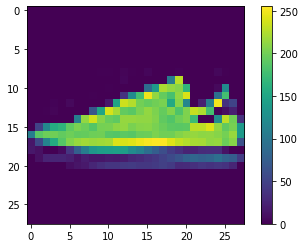

In [42]:
plot.figure()
plot.imshow(train_images[6])
plot.colorbar()
plot.grid(False)
plot.show()

In [43]:
print('Predicted value :' ,class_names[argmax[6]])  # precdiction

Predicted value : Sneaker


In [44]:
print('Actual value :' ,class_names[train_labels[6]])  #ground truth

Actual value : Sneaker


In [45]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plot.grid(False)
  plot.xticks([])
  plot.yticks([])

  plot.imshow(img, cmap=plot.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plot.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plot.grid(False)
  plot.xticks(range(10))
  plot.yticks([])
  thisplot = plot.bar(range(10), predictions_array, color="#777777")
  plot.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

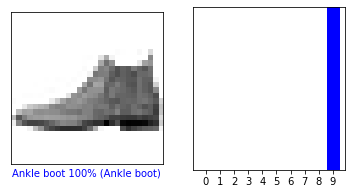

In [46]:
i = 0
plot.figure(figsize=(6,3))
plot.subplot(1,2,1)
plot_image(i, probability[i], test_labels, test_images)
plot.subplot(1,2,2)
plot_value_array(i, probability[i],  test_labels)
plot.show()

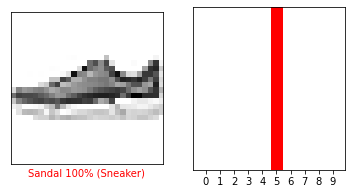

In [47]:
i = 9
plot.figure(figsize=(6,3))
plot.subplot(1,2,1)
plot_image(i, probability[i], test_labels, test_images)
plot.subplot(1,2,2)
plot_value_array(i, probability[i],  test_labels)
plot.show()

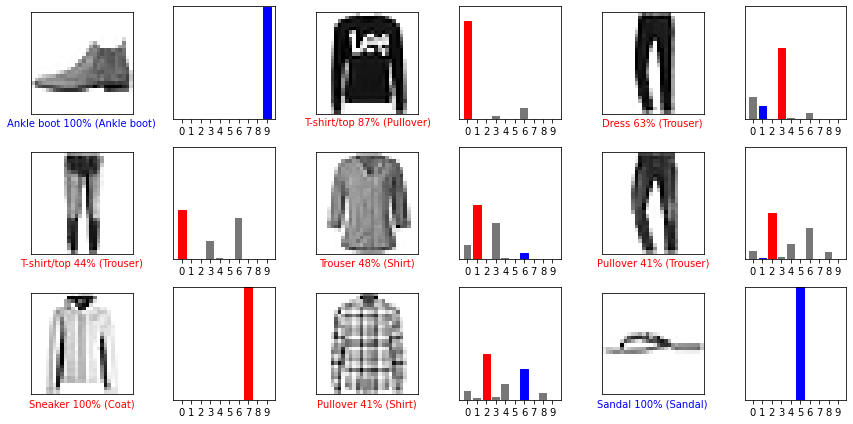

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plot.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plot.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, probability[i], test_labels, test_images)
  plot.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, probability[i], test_labels)
plot.tight_layout()
plot.show()

In [ ]:
#Question 3: Compare the performance of the LSTM RNN network vs CNN.

#           RNN can model sequences of data so that each sample can be assumed to be dependent on previous ones.
#           CNNs are commonly used in solving problems related to spatial data, such as images.RNNs are better suited to analyzing temporal, sequential data, such
#           as text or videos.
#           CNNs are "feed-forward neural networks" that use filters and pooling layers,whereas RNNs feed results back into the network.
#           In CNNs, the size of the input and the resulting output are fixed. That is, a CNN receives images of fixed size and outputs them to the appropriate level,
#           along with the confidence level of its prediction.In RNNs, the size of the input and the resulting output may vary.
#           CNN is faster than RNN, because CNN is nothing to have store in a memory as RNN.

#  To achieve the same test performance CNN is taking less time than LSTM RNN.As CNN are good for fixed length input data like images, facial recognition, medical 
#  analysis and classification.
#  LSTM RNN is good for text translation, natural language processing, sentiment analysis and speech analysis. Training the RNN is a very difficult task.
#  It cannot process very long sequences if using tanh or relu as an activation function. 
#  In LSTM ,Pre-processing can increase the score by providing high-quality input data. Cross Validation detects and prevents overfitting and the decrease of score caused by overfitting. 







          